## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""


In [1]:
import os
import keras

# Try to enable GPU (optional)


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - x.min(axis = 0)) / (x.max(axis = 0) - x.min(axis = 0)) * 2 - 1
       
    if flatten:
        x = x.reshape(len(x), -1)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 369us/step - loss: 1.7340 - acc: 0.3825 - val_loss: 1.5564 - val_acc: 0.4529
Epoch 2/100
50000/50000 [==============================] - 17s 333us/step - loss: 1.4950 - acc: 0.4739 - val_loss: 1.4724 - val_acc: 0.4783
Epoch 3/100
50000/50000 [==============================] - 16s 322us/step - loss: 1.3755 - acc: 0.5160 - val_loss: 1.4301 - val_acc: 0.4952
Epoch 4/100
50000/50000 [==============================] - 16s 320us/step - loss: 1.2822 - acc: 0.5471 - val_loss: 1.3856 - val_acc: 0.5097
Epoch 5/100
50000/50000 [==============================] - 16s 323us/step - loss: 1.1941 - acc: 0.5805 - val_loss: 1.3504 - val_acc: 0.5253
Epoch 6/100
50000/50000 [==============================] - 16s 325us/step - loss: 1.1162 - acc: 0.6060 - val_loss: 1.3807 - val_acc: 0.5233
Epoch 7/100
50000/50000 [==============================] - 16s 324us/step - loss: 1.0392 - acc: 0.6340 - val_l

Epoch 59/100
50000/50000 [==============================] - 16s 320us/step - loss: 0.0828 - acc: 0.9724 - val_loss: 3.6198 - val_acc: 0.5360
Epoch 60/100
50000/50000 [==============================] - 16s 321us/step - loss: 0.1067 - acc: 0.9645 - val_loss: 3.6365 - val_acc: 0.5344
Epoch 61/100
50000/50000 [==============================] - 16s 320us/step - loss: 0.1010 - acc: 0.9664 - val_loss: 3.6994 - val_acc: 0.5209
Epoch 62/100
50000/50000 [==============================] - 16s 319us/step - loss: 0.0867 - acc: 0.9705 - val_loss: 3.6787 - val_acc: 0.5273
Epoch 63/100
50000/50000 [==============================] - 16s 323us/step - loss: 0.0913 - acc: 0.9704 - val_loss: 3.6794 - val_acc: 0.5279
Epoch 64/100
50000/50000 [==============================] - 16s 320us/step - loss: 0.0979 - acc: 0.9675 - val_loss: 3.7122 - val_acc: 0.5267
Epoch 65/100
50000/50000 [==============================] - 16s 323us/step - loss: 0.0978 - acc: 0.9676 - val_loss: 3.6537 - val_acc: 0.5274
Epoch 66/100


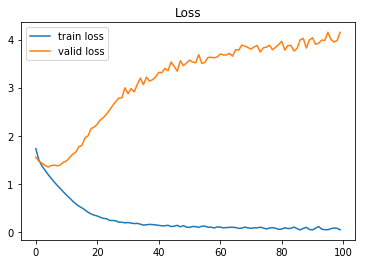

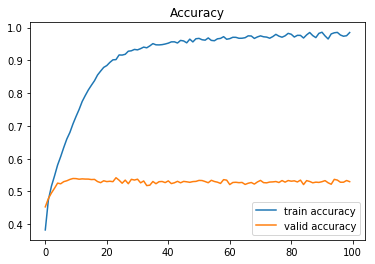

In [16]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()